In [70]:
bbbp_embedding_path= "/usr/WS1/jones289/molformer/extract/bbbp_molformer_embeddings.pkl"
# dude_embedding_path="/usr/WS1/jones289/molformer/extract/vgfr2_dude_molformer_embeddings.pkl"
# lit_pcba_embedding_path="/usr/WS1/jones289/molformer/extract/PPARG_lit-pcba_molformer_embeddings.pkl"

In [71]:
import pickle
import numpy as np
import sys
from tqdm import tqdm

sys.path.append("/g/g13/jones289/workspace/hd-cuda-master")



from sklearn.metrics import classification_report, roc_auc_score
from hdpy.hdpy.metrics import compute_enrichment_factor

In [72]:
import torch



def main(embed_path):
    with open(embed_path, "rb") as handle:
        data = pickle.load(handle)

        rep_list = []
        label_list = []
        time_list = []

        for batch_idx, batch in enumerate(data):
            batch_reps = batch[0]
#             import pdb
#             pdb.set_trace()
        
            reps = torch.cat([batch_reps[x].mean(dim=1) for x in range(len(batch_reps))], dim=0)
            rep_list.append(reps)
            label_list.append(torch.cat([torch.from_numpy(np.asarray(x)) for x in batch[2]]))
                                
            time = sum(batch[1]) / sum([batch[0][x].shape[0] for x in range(len(batch[0]))])
                
            time_list.append(time)
                
        return torch.cat(rep_list, dim=0), torch.cat(label_list, dim=0), time_list
    

In [73]:
# embeds = main(dude_embedding_path)
# embeds = main(lit_pcba_embedding_path)
embeds = main(bbbp_embedding_path)

In [74]:
embeds

(tensor([[-0.1664, -0.1887, -0.1539,  ..., -0.3031,  0.1611,  0.1840],
         [-0.1760, -0.1832, -0.2174,  ..., -0.0880,  0.3259,  0.0615],
         [ 0.1320,  0.6708,  0.5168,  ...,  0.3000, -0.2778, -0.1778],
         ...,
         [ 0.3150, -0.1629,  0.0308,  ...,  0.2563,  0.0412,  0.2918],
         [ 0.2828,  0.4785, -0.8548,  ...,  0.2698,  0.0590,  0.0198],
         [ 0.3998,  0.6554,  0.5487,  ...,  0.1056, -0.3517,  0.3714]]),
 tensor([1, 1, 1,  ..., 1, 1, 1]),
 [0.013175828116280692,
  0.011357975006103516,
  0.009365743206393334,
  0.009987958272298177,
  0.009582911768267232,
  0.009771404595210635,
  0.012132188548212465,
  0.012461669743061066,
  0.010657986005147299,
  0.011121715818132673,
  0.011572670936584473,
  0.01079085043498448,
  0.010170070330301921,
  0.009802818298339844,
  0.009413734559089906,
  0.009586691856384277,
  0.011299140751361847,
  0.009761510356780021,
  0.009523041546344757,
  0.01008135272610572,
  0.009864315390586853,
  0.0088426451529226,

In [75]:
embeds[0].shape, embeds[1].shape

(torch.Size([1892, 768]), torch.Size([1892]))

In [76]:
print(np.mean(embeds[2]))

0.011113157848385914


In [77]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [78]:
from sklearn.pipeline import make_pipeline

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(embeds[0])



Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [79]:
tsne_pipe = make_pipeline(StandardScaler(), TSNE())

In [80]:
pca_comps = pca_pipe.transform(embeds[0])
pca_comps

array([[ 4.18638086e+00, -4.82306748e+00,  7.18679623e+00, ...,
        -3.92639292e-02,  7.06701363e-02, -9.93572362e-08],
       [ 4.68882385e+00, -5.80189317e+00,  2.30102244e+00, ...,
        -6.38572940e-02,  6.58441873e-02,  2.61180358e-08],
       [-6.60017692e+00, -6.73911822e+00, -4.40078216e+00, ...,
        -8.54335524e-02,  4.34495556e-03, -8.45806347e-09],
       ...,
       [-1.03348346e+01,  1.84153545e+01,  2.28650372e+00, ...,
         2.28077251e-02,  1.85203654e-01, -1.41040548e-08],
       [ 1.86615733e-02,  5.10505870e-01,  4.18040894e+00, ...,
         4.50842321e-02, -3.70951102e-03, -1.66552758e-08],
       [ 9.01398412e+00,  6.62676600e+00, -7.17599553e+00, ...,
         9.48636194e-03, -1.87051733e-02, -1.28009567e-08]])

In [81]:
tsne_comps = tsne_pipe.fit_transform(embeds[0])
tsne_comps

/usr/workspace/wsa/jones289/miniconda3/envs/HD_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/workspace/wsa/jones289/miniconda3/envs/HD_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  4.020204,  47.88193 ],
       [  8.326633,  16.409771],
       [ 11.079222, -10.34401 ],
       ...,
       [-24.955212, -66.454704],
       [ -6.261239,  32.834137],
       [ 27.17039 ,  32.657715]], dtype=float32)

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
from matplotlib.colors import ListedColormap


/usr/workspace/wsa/jones289/miniconda3/envs/HD_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/workspace/wsa/jones289/miniconda3/envs/HD_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TSNE')

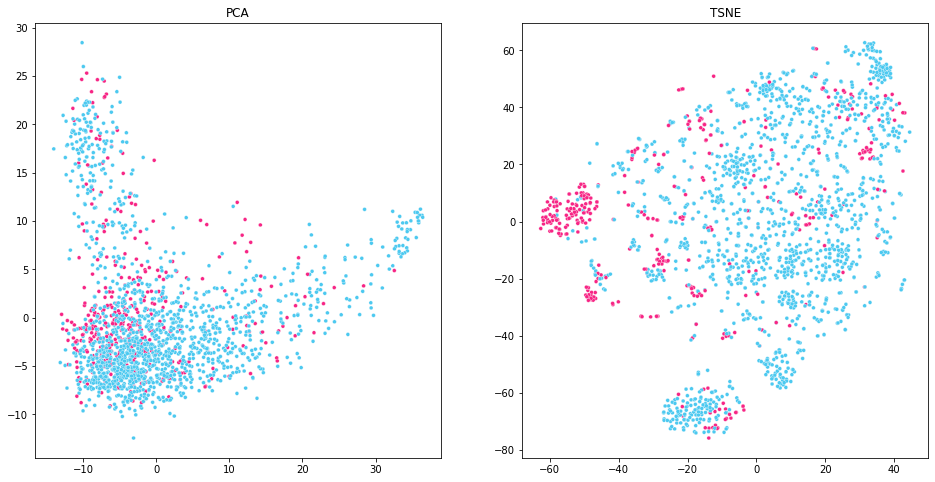

In [83]:
f, ax = plt.subplots(1,2, figsize=(16,8))
ax=ax.flatten()
# palette=mpl.colormaps["Muted"]
flatui = ["#F72585", "#4CC9F0"]
cmap = ListedColormap(sns.color_palette(flatui).as_hex())
sns.scatterplot(pca_comps[:, 0], pca_comps[:, 1], c=embeds[1], s=15, ax=ax[0], cmap=cmap)
sns.scatterplot(tsne_comps[:, 0], tsne_comps[:, 1], c=embeds[1], s=15, ax=ax[1], cmap=cmap)

ax[0].set_title("PCA")
ax[1].set_title("TSNE")


In [84]:
from hdpy.hdpy.baseline_hd.classification_modules import RPEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(embeds[0], embeds[1], test_size=.2, stratify=embeds[1])

In [86]:
def main(x_train, y_train, x_test, y_test, epochs=1, D=10000, n_seeds=1):
    
    
    y_train = y_train.int()
    y_test = y_test.int()
    
    
    f, ax = plt.subplots(1,1, figsize=(10,10))
    
#     for seed in tqdm(list(range(n_seeds)), total=n_seeds):
    
    
    rp_enc = RPEncoder(input_size=x_train.shape[1], D=D, num_classes=2)
    train_hvs = rp_enc.encode(x_train).float()
    test_hvs = rp_enc.encode(x_test).float()


    # rp_enc.build_am(dataset_hvs=hvs, labels=bbbp_embeds[1])
    rp_enc.build_am(dataset_hvs=train_hvs, labels=y_train)

    mistake_list = []
    for i in tqdm(range(epochs)):
        mistake_ct = rp_enc.retrain(dataset_hvs=train_hvs, labels=y_train, return_mistake_count=True)
        mistake_list.append(mistake_ct)

    ax.plot(list(range(len(mistake_list))),mistake_list)

    # affine transormation (inversion via translation by -1) seems to improve performance...sometimes??
#     preds = 1 - rp_enc.forward(test_hvs)
    preds = rp_enc.forward(test_hvs)
    scores = rp_enc.compute_confidence(test_hvs.float())


#     import pdb
#     pdb.set_trace()
    print(classification_report(y_true=y_test, y_pred=preds))
    print(roc_auc_score(y_true=y_test, y_score=scores))
    enrich_10 = compute_enrichment_factor(scores, y_test, n_percent=.1)
    enrich_1 = compute_enrichment_factor(scores, y_test, n_percent=.01)
    print(enrich_1, enrich_10)

    cm = confusion_matrix(y_test, preds, labels=[0,1])

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=[0,1])

    disp.plot()

    #     sns.distplot(scores)

100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

              precision    recall  f1-score   support

           0       0.19      0.82      0.31        76
           1       0.75      0.14      0.23       303

    accuracy                           0.27       379
   macro avg       0.47      0.48      0.27       379
weighted avg       0.63      0.27      0.25       379

0.6173354177523015
tensor(1.2508) tensor(1.0862)


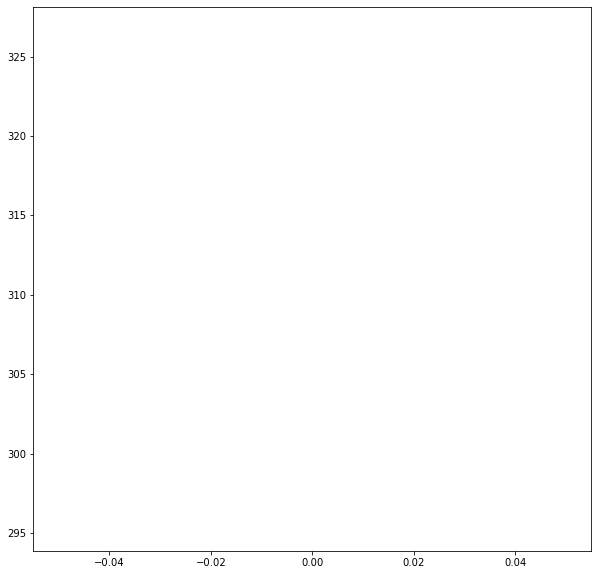

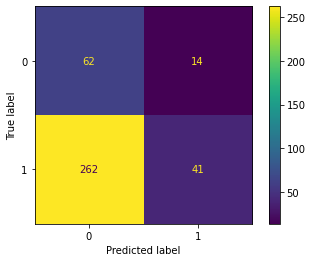

In [87]:
main(x_train=x_train, y_train=y_train,
     x_test=x_test, y_test=y_test, 
     epochs=1)

100%|██████████| 10/10 [00:02<00:00,  3.36it/s]

              precision    recall  f1-score   support

           0       0.12      0.43      0.19        76
           1       0.63      0.24      0.34       303

    accuracy                           0.28       379
   macro avg       0.38      0.34      0.27       379
weighted avg       0.53      0.28      0.31       379

0.7116988014590934
tensor(1.2508) tensor(1.1850)


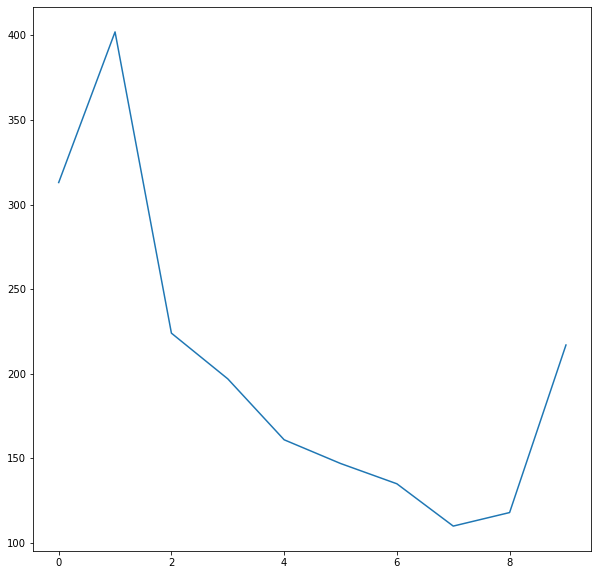

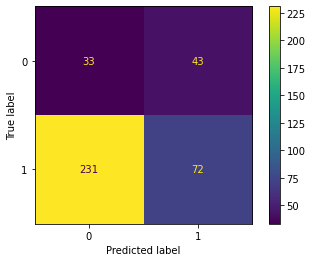

In [88]:
main(x_train=x_train, y_train=y_train,
     x_test=x_test, y_test=y_test, 
     epochs=10)

100%|██████████| 100/100 [00:27<00:00,  3.60it/s]

              precision    recall  f1-score   support

           0       0.10      0.39      0.16        76
           1       0.44      0.12      0.19       303

    accuracy                           0.17       379
   macro avg       0.27      0.26      0.17       379
weighted avg       0.37      0.17      0.18       379

0.8296421747437902
tensor(1.2508) tensor(1.2179)


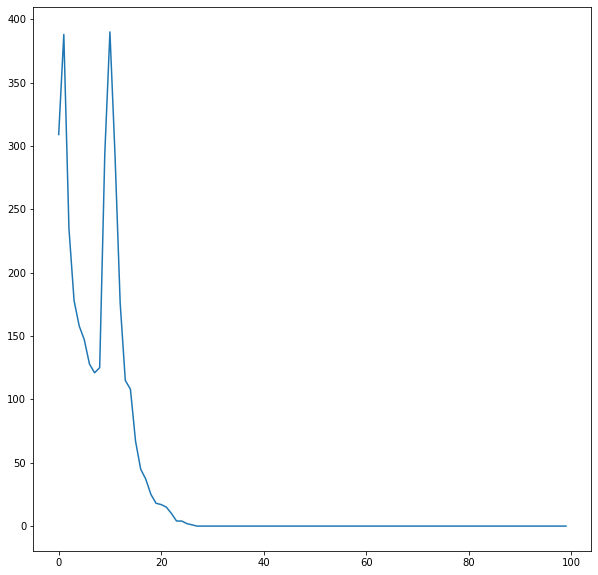

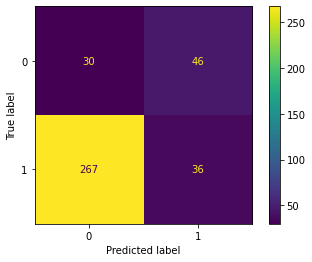

In [89]:
main(x_train=x_train, x_test=x_test,
     y_train=y_train, y_test=y_test,
     epochs=100)

100%|██████████| 200/200 [00:53<00:00,  3.75it/s]


              precision    recall  f1-score   support

           0       0.10      0.41      0.16        76
           1       0.41      0.10      0.16       303

    accuracy                           0.16       379
   macro avg       0.26      0.26      0.16       379
weighted avg       0.35      0.16      0.16       379

0.83042383185687
tensor(1.2508) tensor(1.1850)


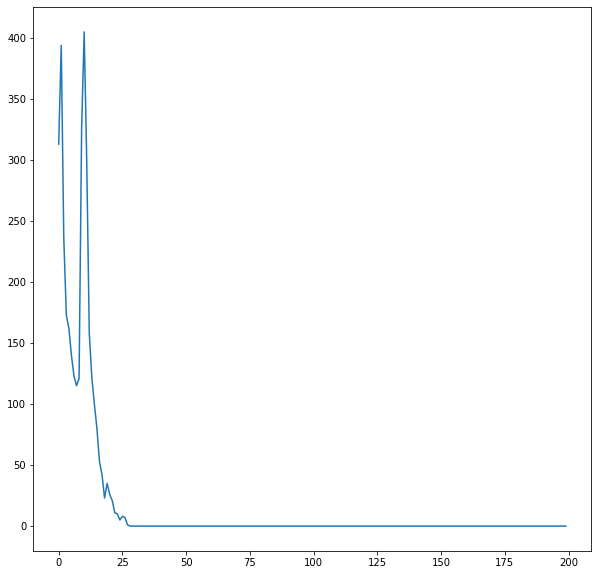

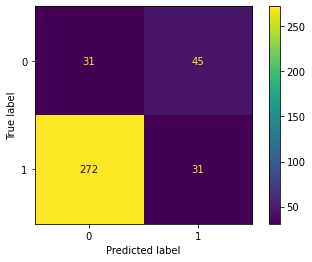

In [90]:
main(x_train=x_train, x_test=x_test,
     y_train=y_train, y_test=y_test,
     epochs=200)

In [91]:

def distance_matrix_plot(data, labels):
    
    positive_data = data[labels == 1]
    negative_data = data[labels == 0]
    
    
    data = np.concatenate([positive_data, negative_data])
    
    
    # Create a cosine similarity matrix
    cosine_similarity_matrix = np.dot(data, data.T) / np.linalg.norm(data, axis=1) / np.linalg.norm(data, axis=1).T

    
    f, ax = plt.subplots(1,1, figsize=(10,10))

    
    # Set the plot scale
#     ax.set_xticks(np.arange(len(data)), labels=data[:, 0])
#     ax.set_yticks(np.arange(len(data)), labels=data[:, 0])
    
    # Plot the cosine similarity matrix
    im = ax.imshow(cosine_similarity_matrix, vmin=1, vmax=-1)
    ax.set_title('Pairwise Cosine Similarity Plot')
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Data Point')
#     plt.show()

#     plt.legend()
    plt.colorbar(im, ax=ax)


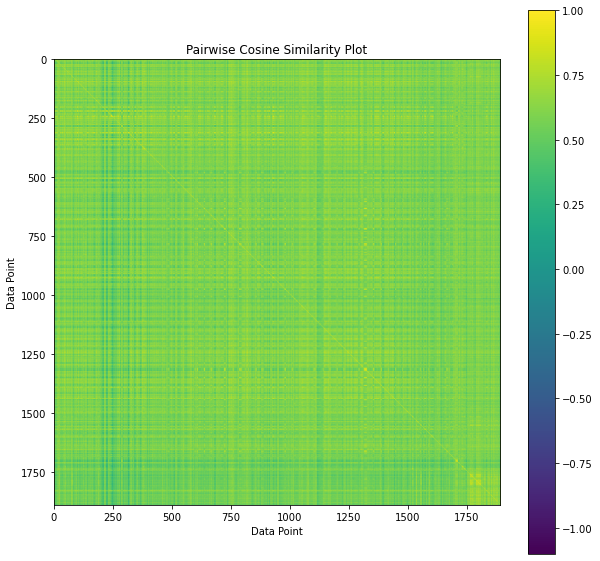

In [92]:
distance_matrix_plot(embeds[0].numpy(), labels=embeds[1].numpy())

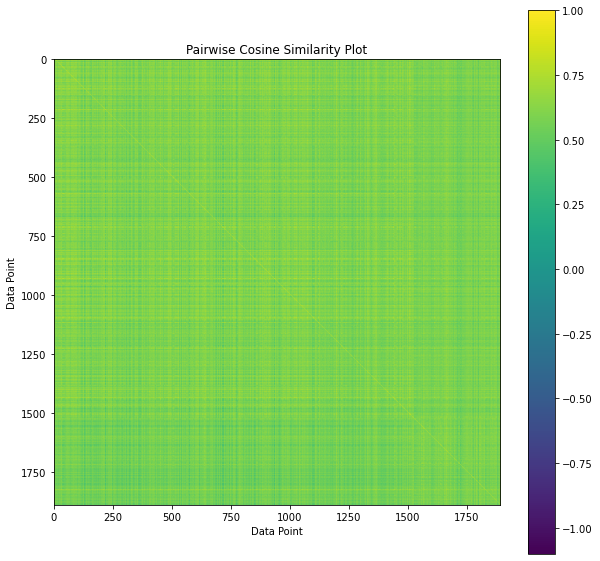

In [93]:
distance_matrix_plot(np.concatenate([x_train,x_test]), labels=np.concatenate([y_train, y_test], axis=0))

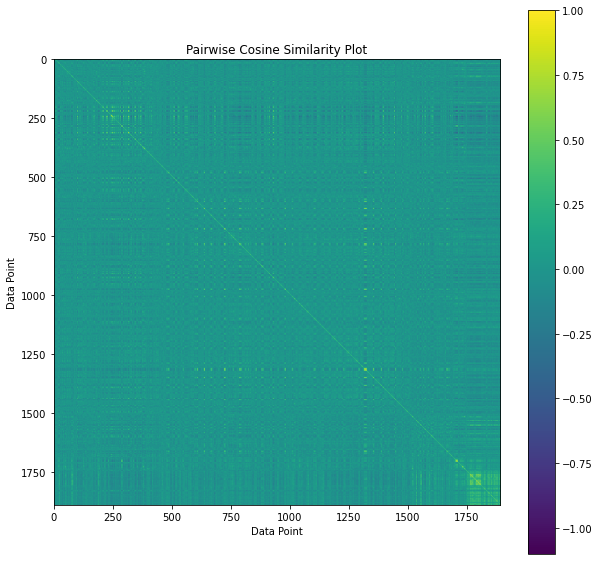

In [94]:
distance_matrix_plot(pca_comps, labels=embeds[1].numpy())

## using PCA as a preprocessing step 
- appears to make learning slower but more stable? the end result is also not great
- what about using PCA on the hypervectors? The [Johnson-Lindenstrauss lemma](https://en.wikipedia.org/wiki/Johnson%E2%80%93Lindenstrauss_lemma) suggests that a set of points in a high-dimensional space CAN be embedded into a space of much lower dimension in such a way that the distances between the points are nearly preserved. (

## Possible next steps
- use only 1 prototype (active class) and learn a threshold on the distances (normalized to [0,1]) to separate (linearly) the actives versus positives 